In [1]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.5 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

--- Task 1 - H on |0> ---
Statevector after operation: [0.70710678+0.j 0.70710678+0.j]


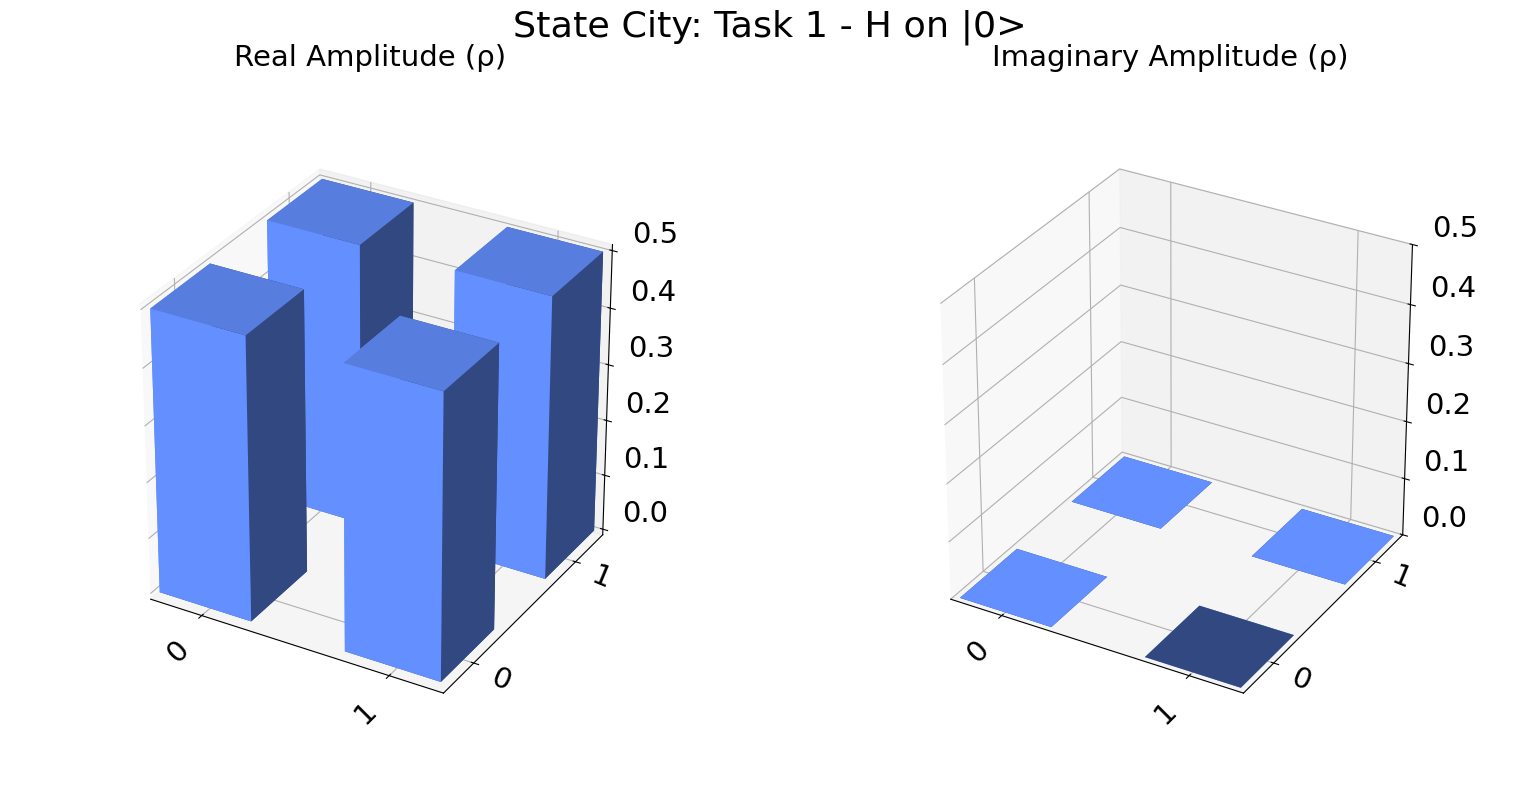

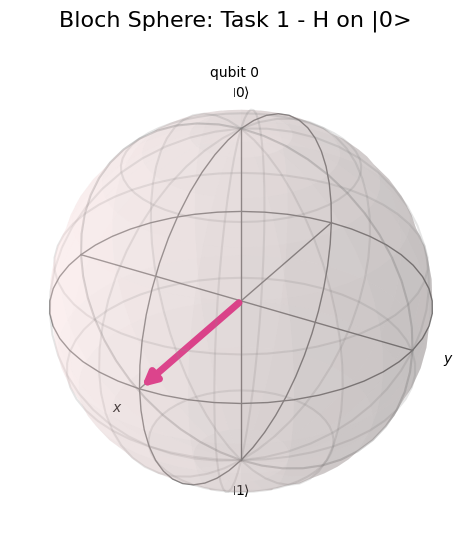

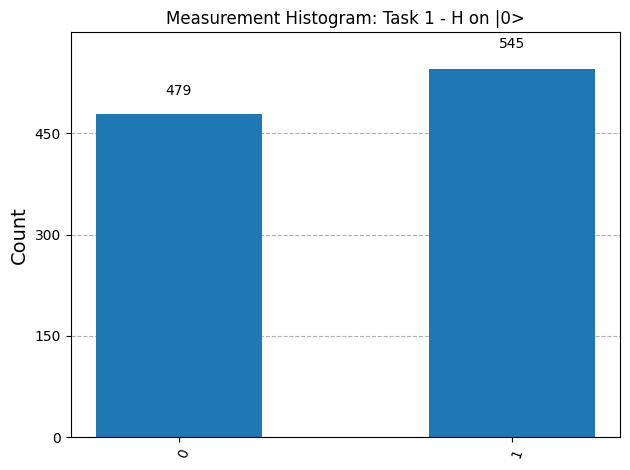



--- Task 1 - H on |1> ---
Statevector after operation: [ 0.70710678+0.j -0.70710678+0.j]


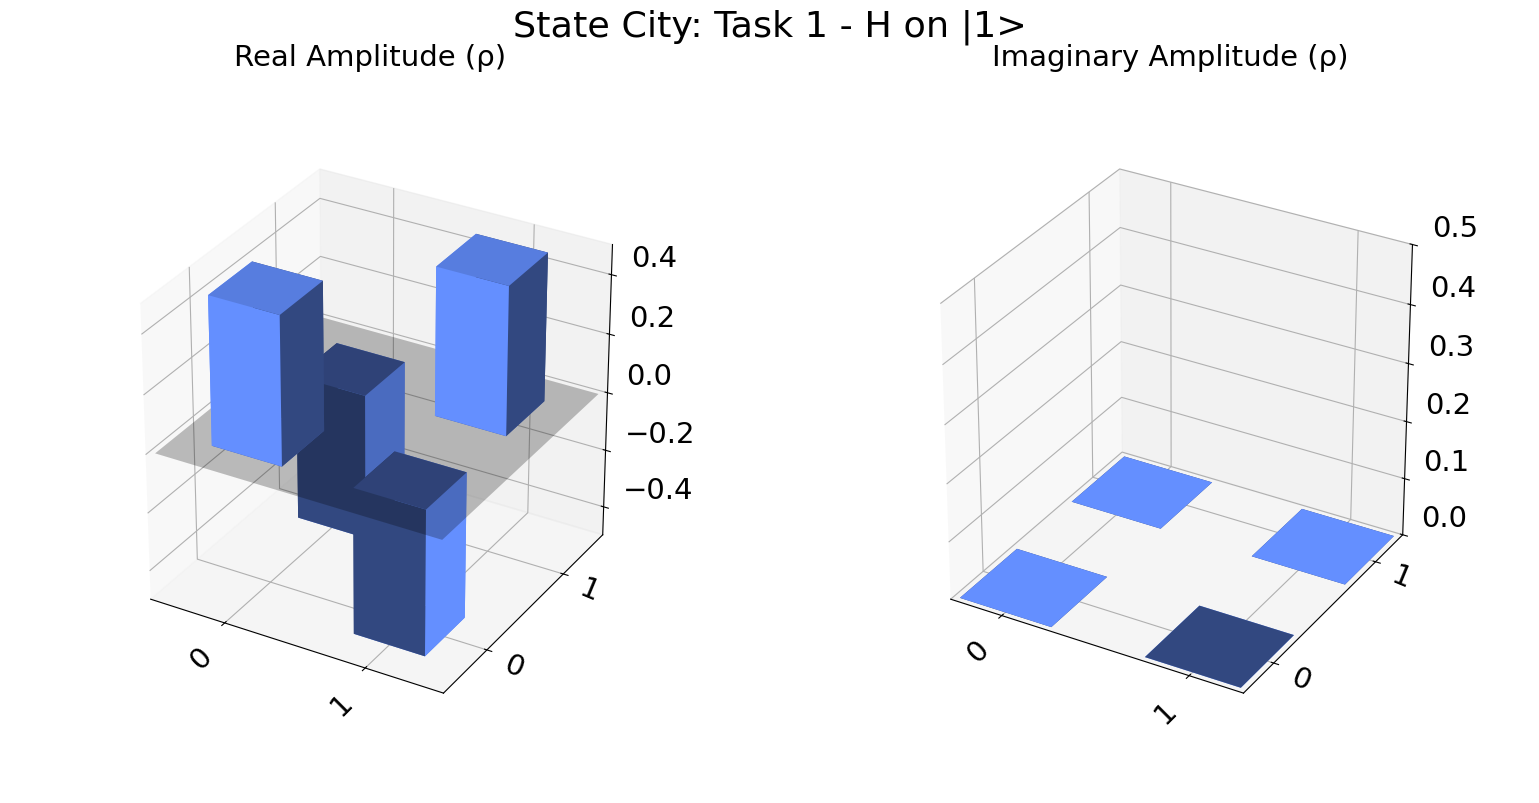

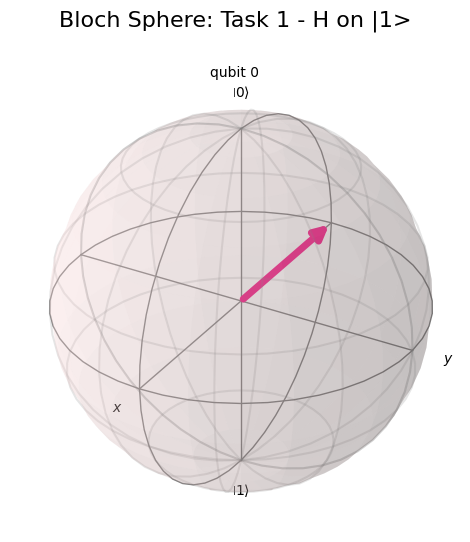

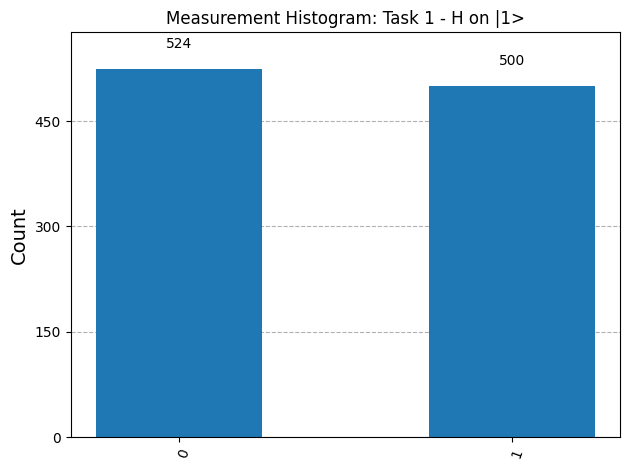



--- Task 1 - H on |+> ---
Statevector after operation: [1.+0.j 0.+0.j]


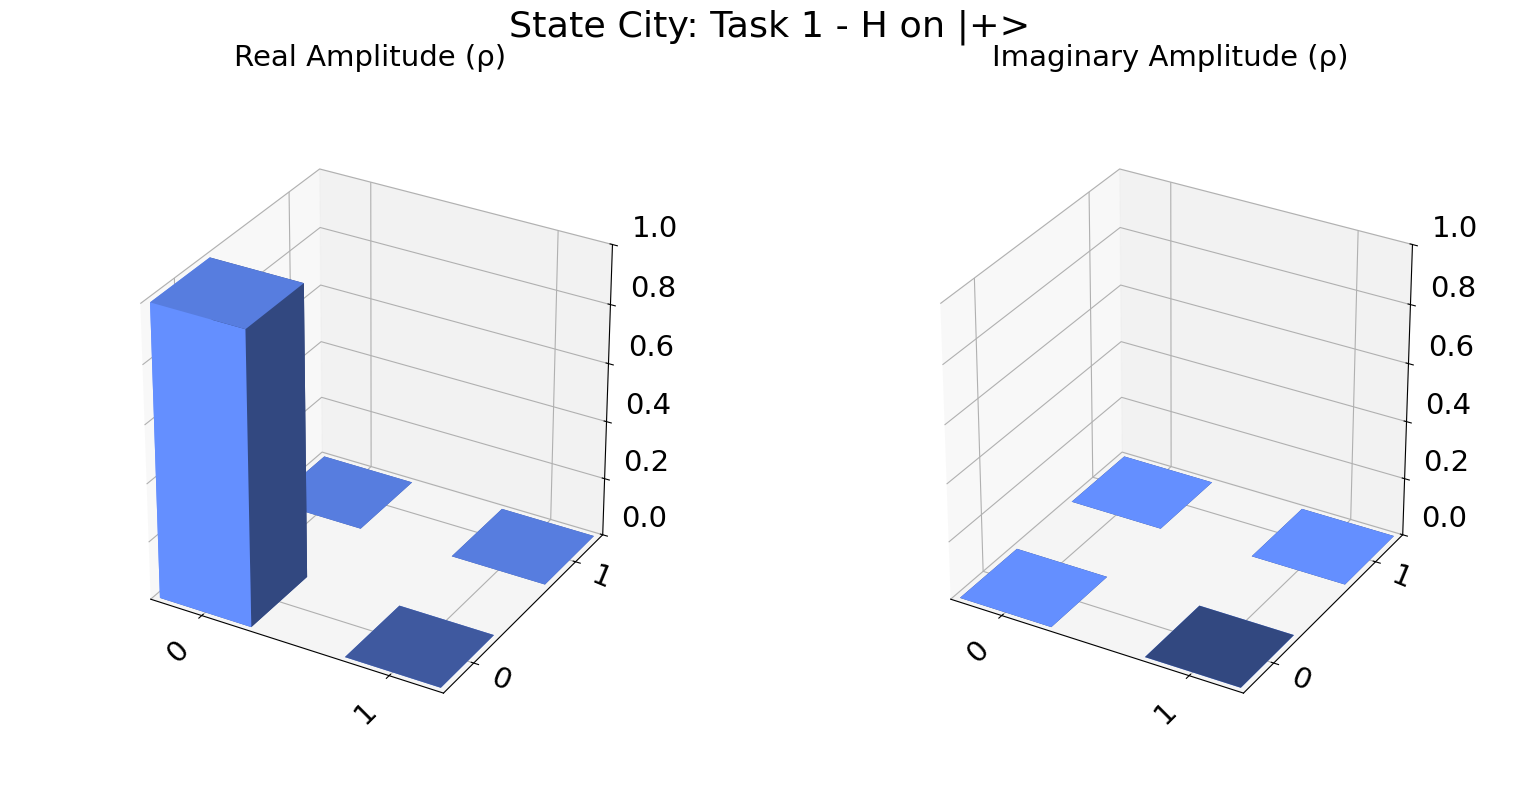

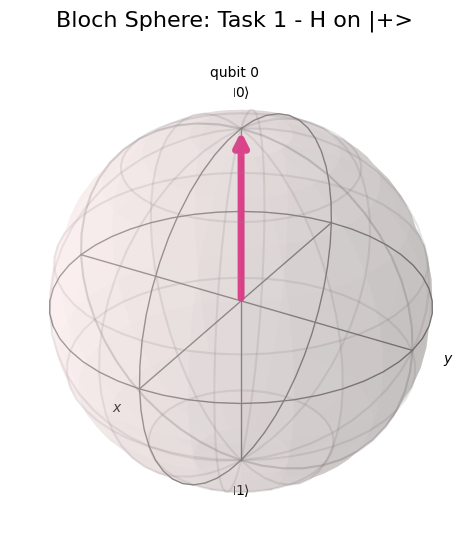

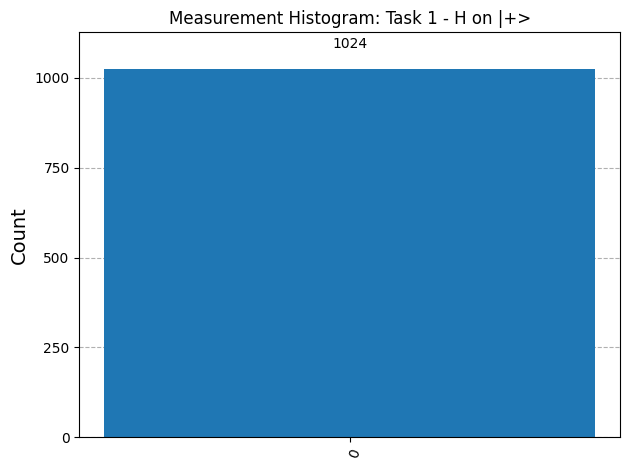



--- Task 1 - H on |-> ---
Statevector after operation: [0.+0.j 1.+0.j]


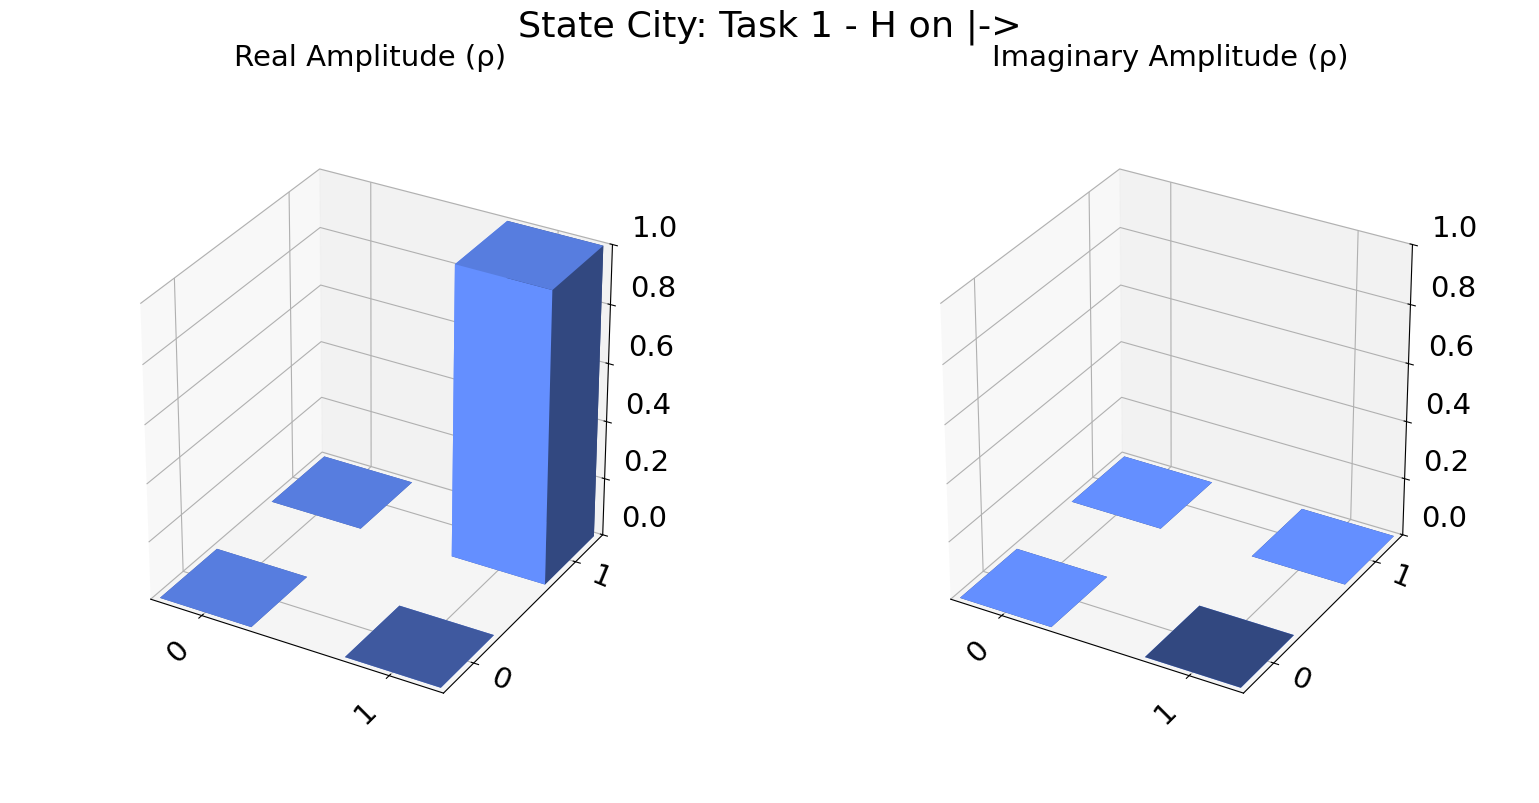

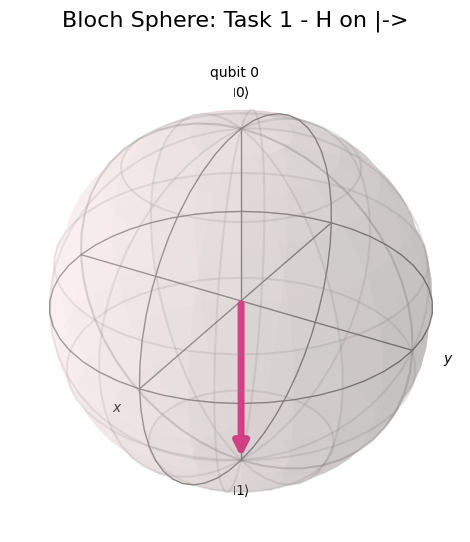

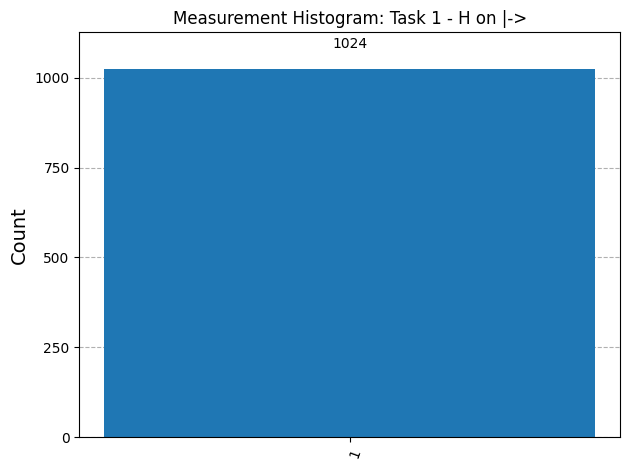



--- Task 2 - Three-Qubit H⊗H⊗H on |000> ---
Statevector: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


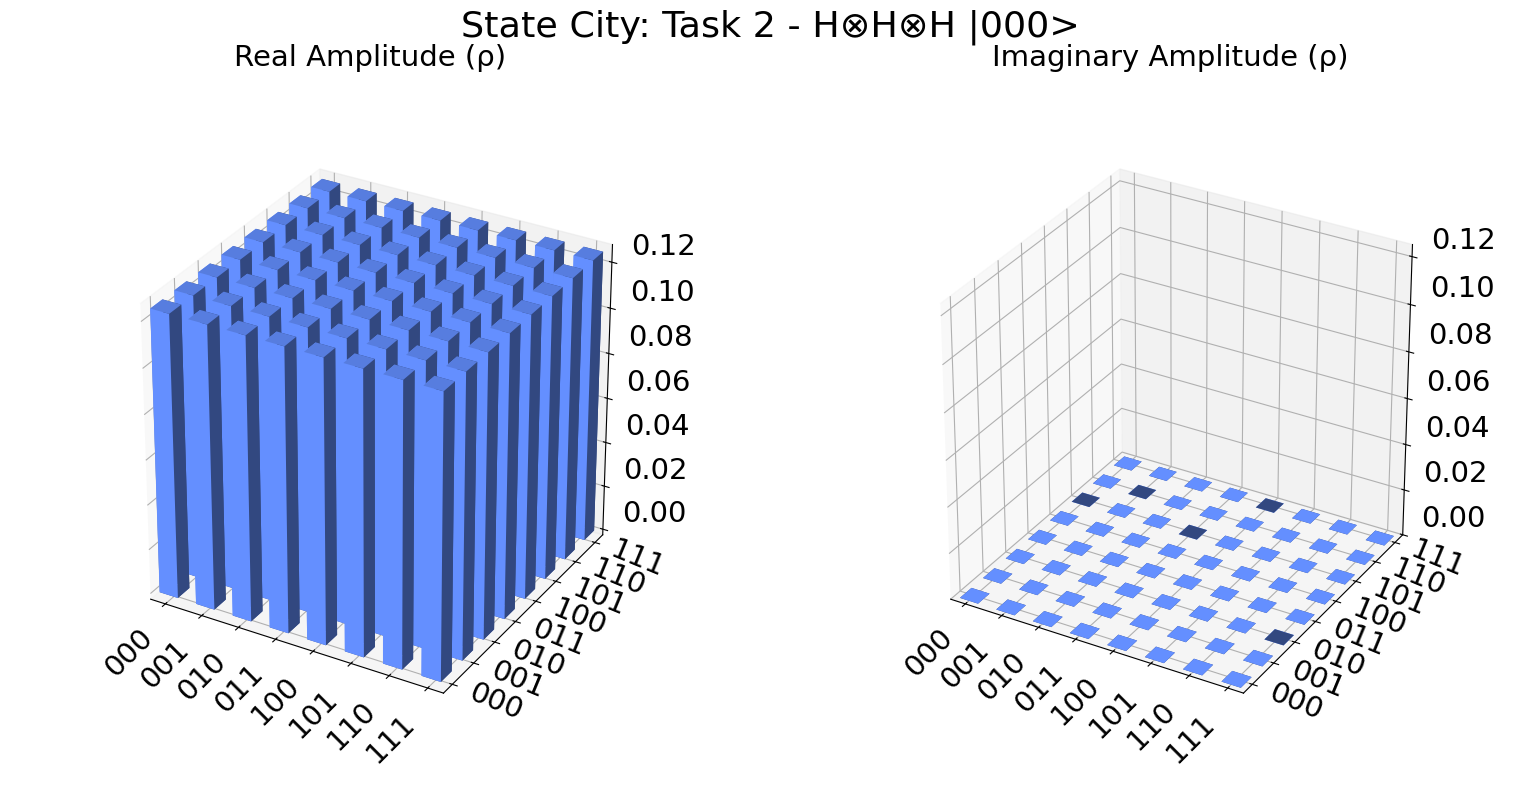

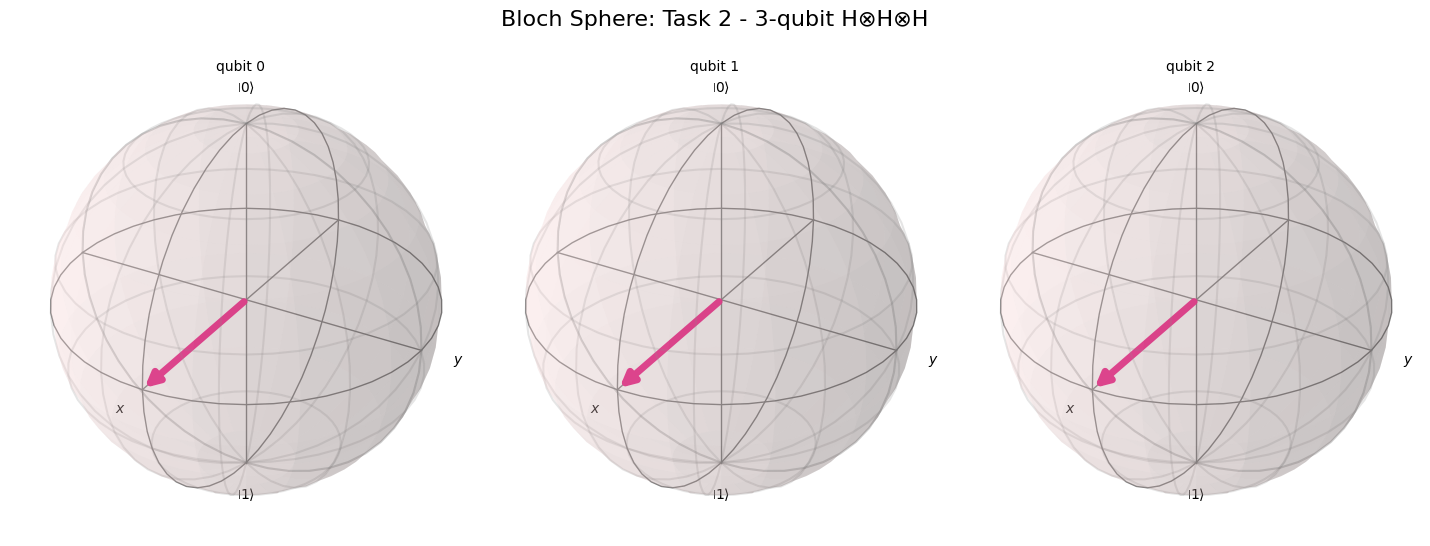

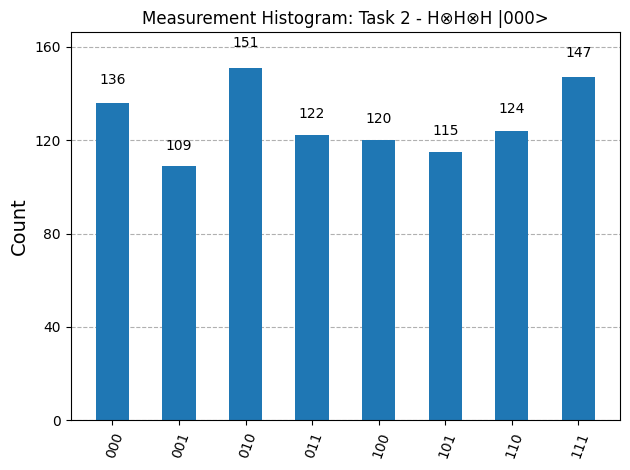


Analytical: equal probability for all 8 basis states.

--- Task 3 - 3-Qubit Entangled Chain (H + CX + CX) ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


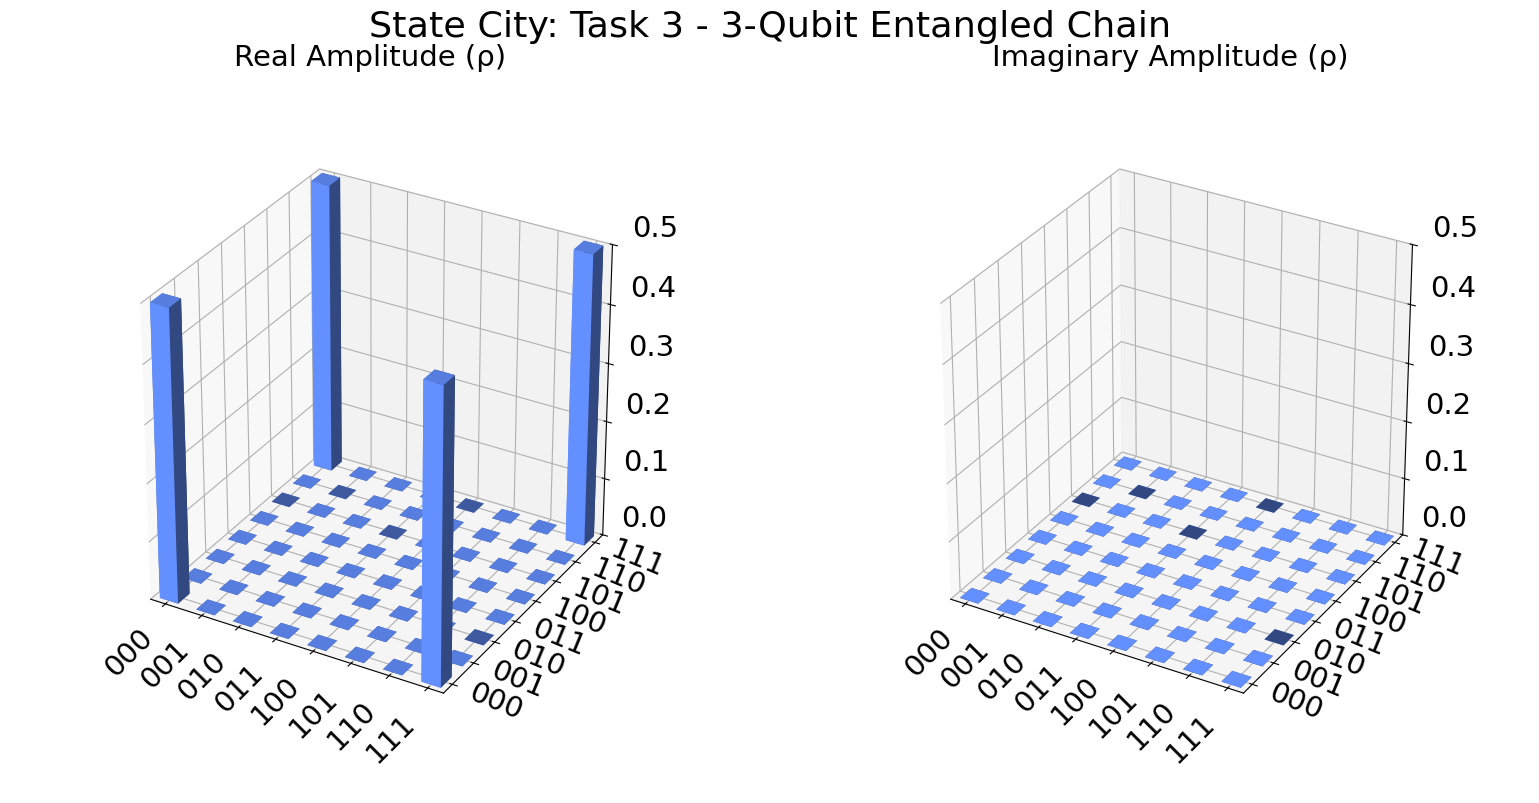

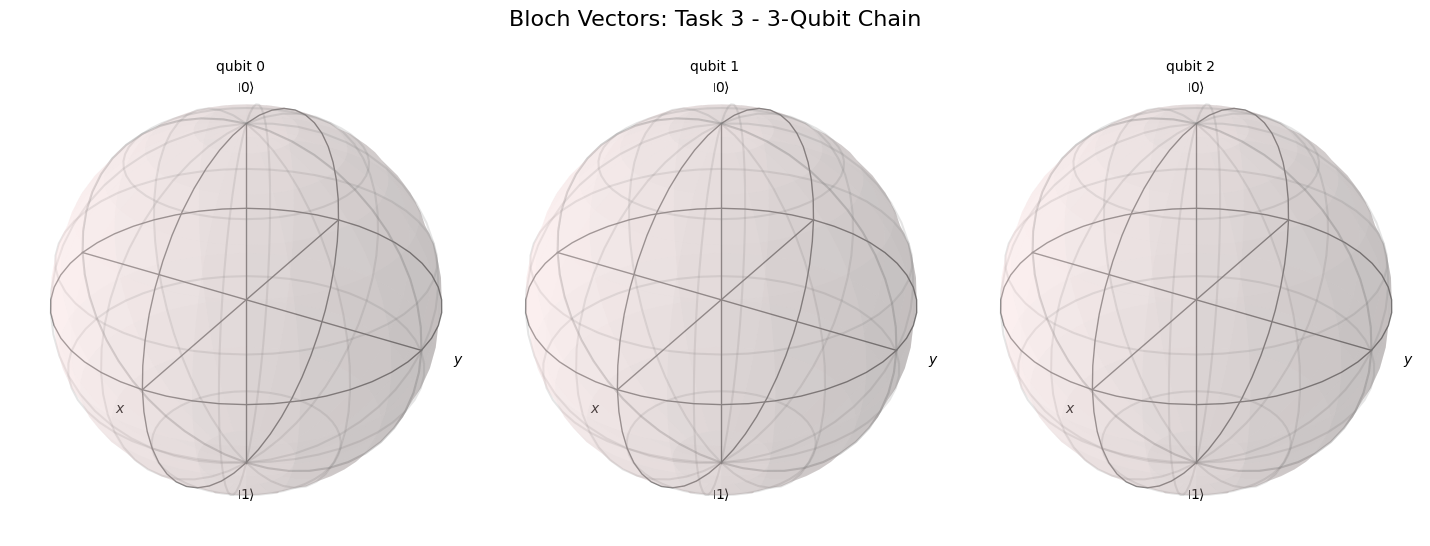

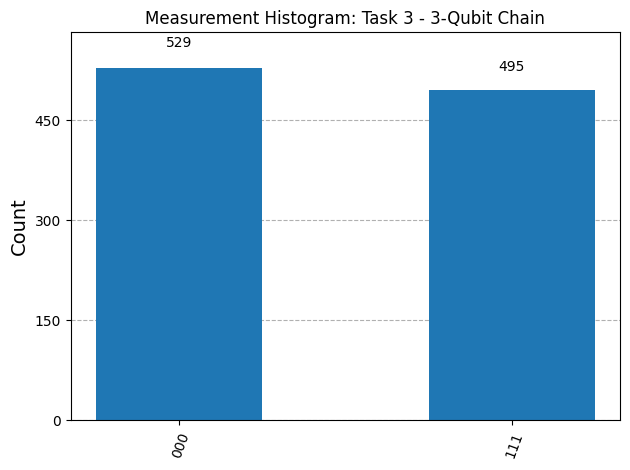


Analytical: outcomes |000> and |111> only — fully correlated.

--- Task 4 - Apply H twice on |1> ---
Statevector: [0.+0.j 1.+0.j]


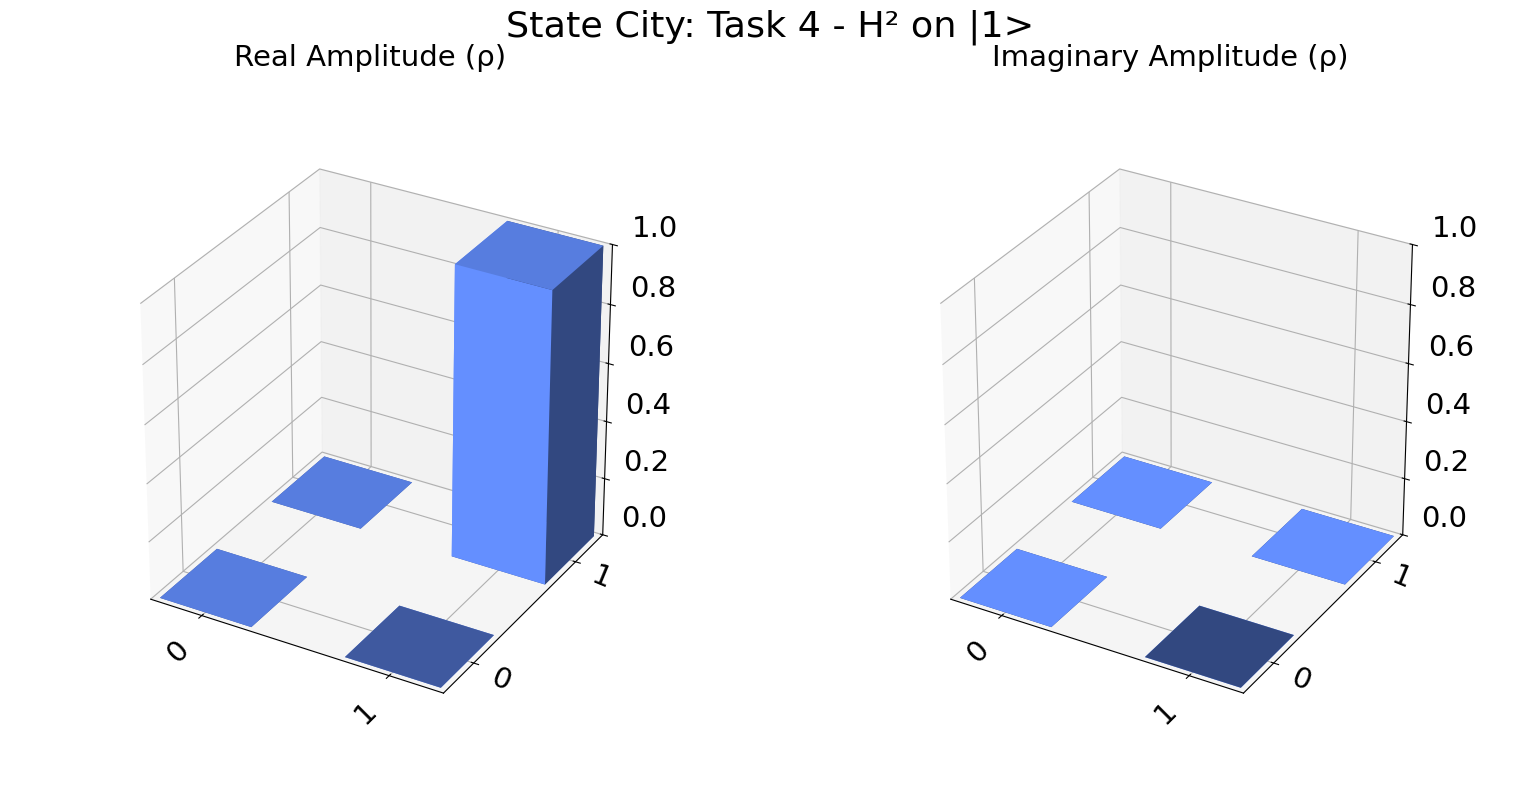

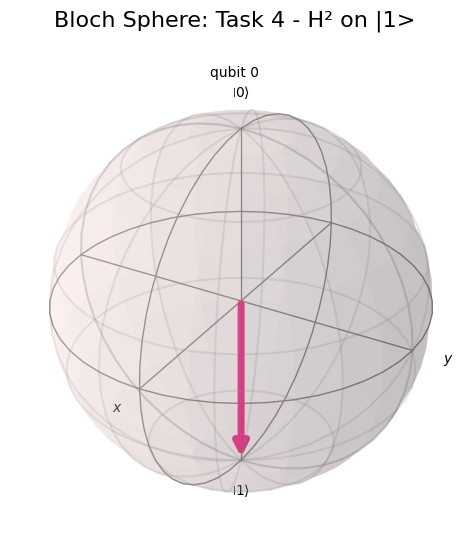

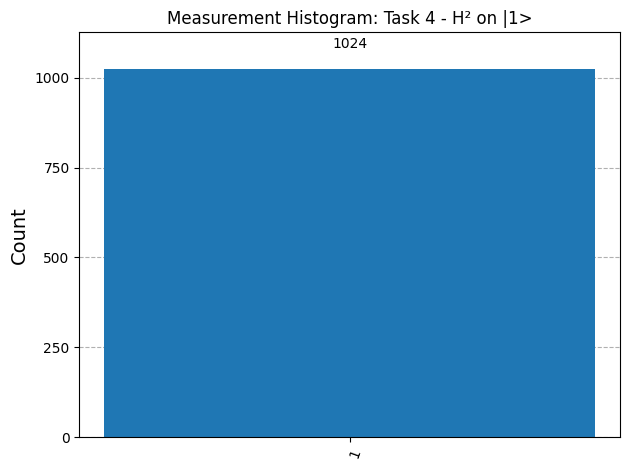


Analytical: Applying H twice returns original state |1>.

--- Task 5 - Bloch Rotation: |0> ---


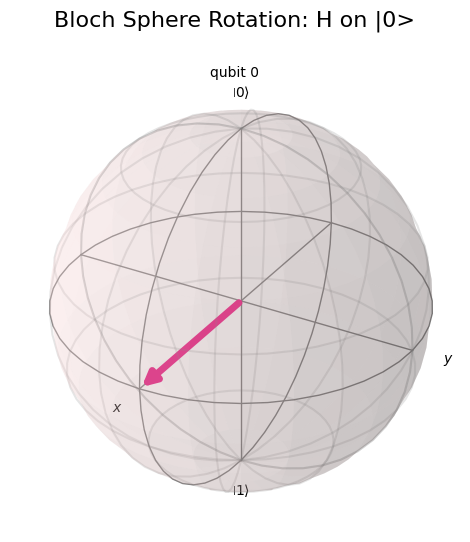



--- Task 5 - Bloch Rotation: |1> ---


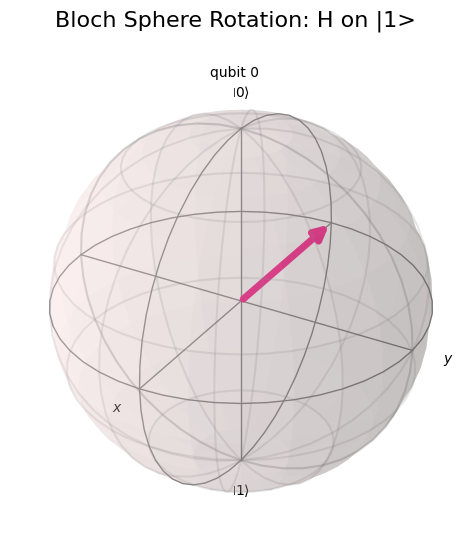



--- Task 5 - Bloch Rotation: |+> ---


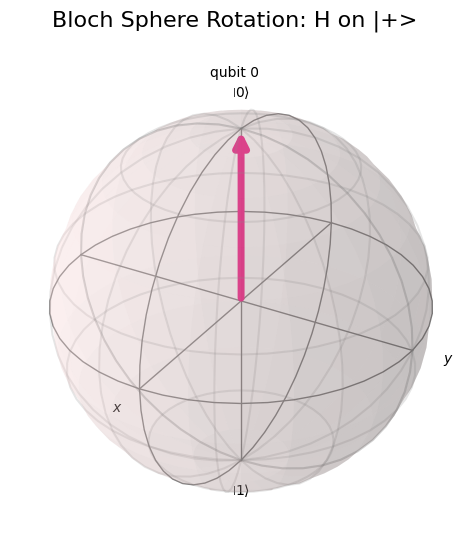



--- Task 5 - Bloch Rotation: |-> ---


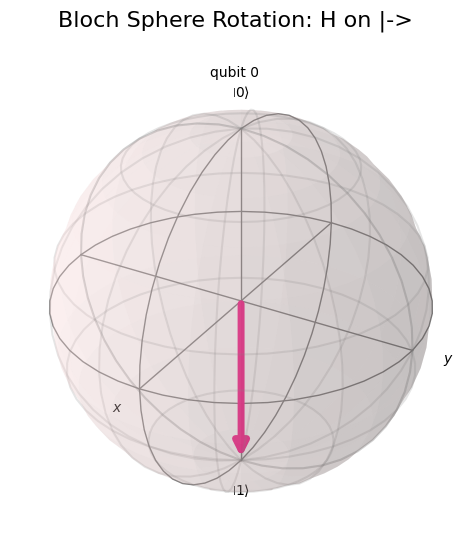

In [3]:
# Helper function
def visualize_state(init_state_vector, label, apply_gates):
    qc = QuantumCircuit(len(init_state_vector).bit_length() - 1, len(init_state_vector).bit_length() - 1)
    qc.initialize(init_state_vector, range(qc.num_qubits))
    apply_gates(qc)
    qc.measure(range(qc.num_qubits), range(qc.num_qubits))

    qc_state = QuantumCircuit(qc.num_qubits)
    qc_state.initialize(init_state_vector, range(qc.num_qubits))
    apply_gates(qc_state)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("Statevector after operation:", state_after.data)

    display(plot_state_city(state_after, title=f"State City: {label}"))
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: {label}"))

    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: {label}"))
    print("\n")


# Task 1: Predict the statevector after H on |0>, |1>, |+>, |->
def hadamard_on_single(qc):
    qc.h(0)

visualize_state(np.array([1, 0]), "Task 1 - H on |0>", hadamard_on_single)
visualize_state(np.array([0, 1]), "Task 1 - H on |1>", hadamard_on_single)
visualize_state(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "Task 1 - H on |+>", hadamard_on_single)
visualize_state(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "Task 1 - H on |->", hadamard_on_single)


# Task 2: Create a 3-qubit system with H⊗H⊗H and analyze measurement probabilities
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("--- Task 2 - Three-Qubit H⊗H⊗H on |000> ---")
print("Statevector:", state3.data)

display(plot_state_city(state3, title="State City: Task 2 - H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch Sphere: Task 2 - 3-qubit H⊗H⊗H"))

sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: Task 2 - H⊗H⊗H |000>"))
print("\nAnalytical: equal probability for all 8 basis states.\n")


# Task 3: Apply H + CX + CX on 3 qubits and analyze correlations
qc_chain = QuantumCircuit(3, 3)
qc_chain.h(0)
qc_chain.cx(0, 1)
qc_chain.cx(1, 2)
qc_chain.measure([0, 1, 2], [0, 1, 2])

qc_chain_state = QuantumCircuit(3)
qc_chain_state.h(0)
qc_chain_state.cx(0, 1)
qc_chain_state.cx(1, 2)
state_chain = Statevector.from_instruction(qc_chain_state)

print("--- Task 3 - 3-Qubit Entangled Chain (H + CX + CX) ---")
print("Statevector:", state_chain.data)

display(plot_state_city(state_chain, title="State City: Task 3 - 3-Qubit Entangled Chain"))
display(plot_bloch_multivector(state_chain, title="Bloch Vectors: Task 3 - 3-Qubit Chain"))

qc_chain_t = transpile(qc_chain, sim)
result_chain = sim.run(qc_chain_t, shots=1024).result()
counts_chain = result_chain.get_counts()
display(plot_histogram(counts_chain, title="Measurement Histogram: Task 3 - 3-Qubit Chain"))
print("\nAnalytical: outcomes |000> and |111> only — fully correlated.\n")


# Task 4: Apply H twice on |1> and verify the original state
qc_doubleH = QuantumCircuit(1, 1)
qc_doubleH.initialize([0, 1], 0)
qc_doubleH.h(0)
qc_doubleH.h(0)
qc_doubleH.measure(0, 0)

qc_doubleH_state = QuantumCircuit(1)
qc_doubleH_state.initialize([0, 1], 0)
qc_doubleH_state.h(0)
qc_doubleH_state.h(0)
state_doubleH = Statevector.from_instruction(qc_doubleH_state)

print("--- Task 4 - Apply H twice on |1> ---")
print("Statevector:", state_doubleH.data)

display(plot_state_city(state_doubleH, title="State City: Task 4 - H² on |1>"))
display(plot_bloch_multivector(state_doubleH, title="Bloch Sphere: Task 4 - H² on |1>"))

qc_doubleH_t = transpile(qc_doubleH, sim)
result_doubleH = sim.run(qc_doubleH_t, shots=1024).result()
counts_doubleH = result_doubleH.get_counts()
display(plot_histogram(counts_doubleH, title="Measurement Histogram: Task 4 - H² on |1>"))
print("\nAnalytical: Applying H twice returns original state |1>.\n")


# Task 5: Use Bloch sphere plots to observe qubit rotations after Hadamard
def plot_bloch_rotation(init_state_vector, label):
    qc = QuantumCircuit(1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    state_after = Statevector.from_instruction(qc)
    print(f"--- Task 5 - Bloch Rotation: {label} ---")
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere Rotation: H on {label}"))
    print("\n")

plot_bloch_rotation(np.array([1, 0]), "|0>")
plot_bloch_rotation(np.array([0, 1]), "|1>")
plot_bloch_rotation(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")
plot_bloch_rotation(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")